Imports and a pair of useful functions

In [3]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

def BRG2RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def readIMG(filename,flagColor = 1):
    return cv2.imread(filename,flagColor)

#Found on: https://note.nkmk.me/en/python-opencv-hconcat-vconcat-np-tile/. Concats readjusting size
def hconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
    h_min = min(im.shape[0] for im in im_list)
    im_list_resize = [cv2.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation)
                      for im in im_list]
    return cv2.hconcat(im_list_resize)

def pintaI(im,title = "img"):
    plt.title(title)
    plt.imshow(im)
    plt.axis('off')
    plt.show()

def pintaMI(vim,title = "imgs"):

    #Pasa a "formato color" las imágenes que estén en blanco y negro
    for i,im in enumerate(vim):
        if len(im.shape) == 2:
            vim[i] = cv2.cvtColor(vim[i],cv2.COLOR_GRAY2BGR)

    #Use found function to resize
    images = hconcat_resize_min(vim)
    pintaI(images,title)


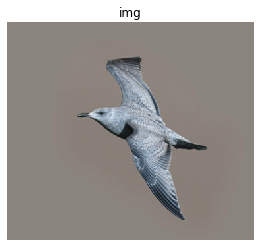

In [5]:
img = readIMG('imagenes/bird.jpg')
pintaI(img)

Vamos ahora a tratar de implementar las funciones que se nos piden. Vamos a aplicar una Gaussiana 2D a esta imagen:

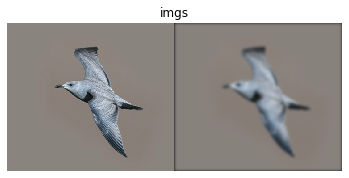

In [20]:
def gaussian2D(img,sigma1 = 1,sigma2 = 0):
    return cv2.GaussianBlur(img,ksize=(101,101),sigmaX=sigma1,sigmaY=sigma2,borderType=cv2.BORDER_ISOLATED) 

blurred = gaussian2D(img,3)
pintaMI([img,blurred])

In [9]:
dxdy = cv2.getDerivKernels(3, 3, 9)
test_img = cv2.sepFilter2D(img,-1,dxdy[0], dxdy[1], borderType = cv2.BORDER_REPLICATE)

if (test_img == blurred).all():
    print("true")
else:
    print("false")

false


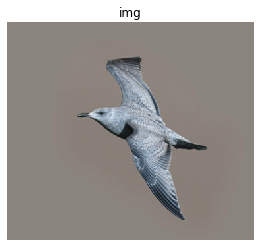

331 375


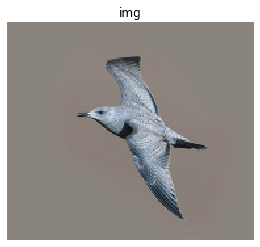

166 188


In [21]:
def subsampling(img):
    i,j = int(img.shape[0]/2),int(img.shape[1]/2)
    v1 = [2*a for a in range(0,i)]
    v2 = [2*a for a in range(0,j)]
    img = np.delete(img,v1,axis = 0)
    img = np.delete(img,v2,axis = 1)
    
    return img

sub = subsampling(img)
pintaI(img)
print(img.shape[0],img.shape[1])
pintaI(sub)
print(sub.shape[0],sub.shape[1])